In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
import matplotlib.pyplot as plt

In [3]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)
G.add_node(8)
G.add_node(9)
G.add_node(10)
G.add_node(11)
G.add_node(12)
G.add_node(13)
G.add_node(14)

In [4]:
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(2, 4)
G.add_edge(2, 6)
G.add_edge(3, 8)
G.add_edge(3, 10)
G.add_edge(4, 11)
G.add_edge(5, 6)
G.add_edge(5, 7)
G.add_edge(6, 7)
G.add_edge(7, 8)
G.add_edge(7, 9)
G.add_edge(8, 9)
G.add_edge(8, 10)
G.add_edge(8, 11)
G.add_edge(9, 12)
G.add_edge(10, 12)
G.add_edge(11, 13)
G.add_edge(12, 14)

In [5]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [6]:
import matplotlib.pyplot as plt

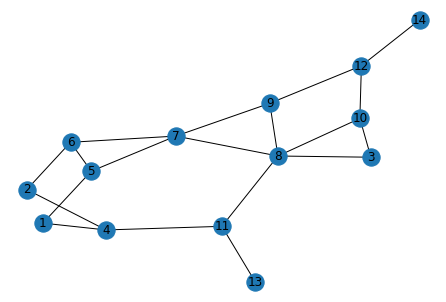

In [7]:
nx.draw(G, with_labels = True)

In [9]:
from torch_geometric.data import Data
import torch

In [10]:
edge_index = torch.tensor(list(G.edges)).t().contiguous()
x = torch.tensor([[i] for i in range(1, G.number_of_nodes() + 1)], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)


In [11]:
data

Data(x=[14, 1], edge_index=[2, 19])

In [12]:
import pickle

In [13]:
with open('pyg_data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [14]:
H = nx.Graph()

In [15]:
H.add_node(1)
H.add_node(2)
H.add_node(3)
H.add_node(4)
H.add_node(5)
H.add_node(6)
H.add_node(7)
H.add_node(8)
H.add_node(9)
H.add_node(10)
H.add_node(11)
H.add_node(12)
H.add_node(13)
H.add_node(14)

In [16]:
H.add_node(15)
H.add_node(16)

In [17]:
H.add_edge(1, 7)
H.add_edge(1, 8)
H.add_edge(1, 4)
H.add_edge(1, 5)
H.add_edge(2, 8)
H.add_edge(2, 7)
H.add_edge(2, 4)
H.add_edge(2, 5)
H.add_edge(3, 6)
H.add_edge(3, 10)
H.add_edge(4, 6)
H.add_edge(4, 10)
H.add_edge(5, 9)
H.add_edge(6, 9)
H.add_edge(7, 13)
H.add_edge(8, 12)
H.add_edge(8, 11)
H.add_edge(9, 11)
H.add_edge(9, 12)
H.add_edge(10, 16)
H.add_edge(11, 13)
H.add_edge(12, 15)
H.add_edge(13, 14)

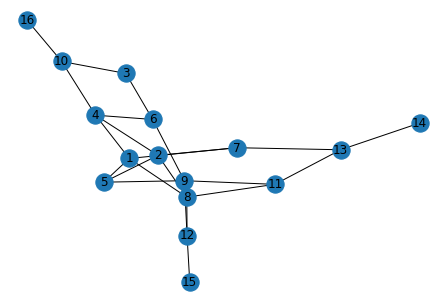

In [18]:
nx.draw(H, with_labels = True)

In [19]:
def calculate_gain(graph, partition, node, set_A, set_B):
    gain = 0
    for neighbor in graph.neighbors(node):
        if neighbor in set_A:
            gain += 1
        elif neighbor in set_B:
            gain -= 1
    return gain

def kernighan_lin(graph):
    best_partition = None
    best_score = -1

    nodes = list(graph.nodes())
    set_A = set(nodes[:len(nodes) // 2])
    set_B = set(nodes[len(nodes) // 2:])

    while True:
        best_node = None
        best_gain = -1

        for node in set_A:
            gain = calculate_gain(graph, best_partition, node, set_A, set_B)
            if gain > best_gain:
                best_node = node
                best_gain = gain

        for node in set_B:
            gain = calculate_gain(graph, best_partition, node, set_A, set_B)
            if gain > best_gain:
                best_node = node
                best_gain = gain

        if best_gain <= 0:
            break

        if best_node in set_A:
            set_A.remove(best_node)
            set_B.add(best_node)
        else:
            set_B.remove(best_node)
            set_A.add(best_node)

        if best_score < best_gain:
            best_score = best_gain
            best_partition = (set_A.copy(), set_B.copy())

    return best_partition

In [21]:
edge_indexh = torch.tensor(list(H.edges)).t().contiguous()
xh = torch.tensor([[i] for i in range(1, H.number_of_nodes() + 1)], dtype=torch.float)
datah = Data(x=xh, edge_index=edge_indexh)

In [22]:
datah

Data(x=[16, 1], edge_index=[2, 23])

In [23]:
with open('pyg_data2.pkl', 'wb') as f:
    pickle.dump(datah, f)